In [1]:
] activate ../ 

In [2]:
using Revise
using POMDPs
using GridInterpolations 
using POMDPModelTools
using POMDPPolicies
using Parameters
using StaticArrays
using DiscreteValueIteration 
using Distributed
using AutomotiveDrivingModels
using AutoViz
using AutomotiveSensors
using AutomotivePOMDPs
using PedestrianAvoidancePOMDP

using FileIO
using JLD2

┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/PedestrianAvoidancePOMDP/UuJ2S.ji for PedestrianAvoidancePOMDP [a80ff0fe-e6a0-11e8-3b05-15413bd5ea7a]
└ @ Base loading.jl:1187
┌ Warning: Package PedestrianAvoidancePOMDP does not have EmergencyBrakingSystem in its dependencies:
│ - If you have PedestrianAvoidancePOMDP checked out for development and have
│   added EmergencyBrakingSystem as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with PedestrianAvoidancePOMDP
└ Loading EmergencyBrakingSystem into PedestrianAvoidancePOMDP from project dependency, future warnings for PedestrianAvoidancePOMDP are suppressed.


In [11]:
pomdp = SingleOCFPOMDP()
pomdp.COLLISION_COST = -600.0
pomdp.ACTION_LON_COST = -1.0
pomdp.ACTION_LAT_COST = 0.0
pomdp.KEEP_VELOCITY_REWARD = 5.0
pomdp.KEEP_LANE_REWARD = 0.0
pomdp.PROBABILITY_PEDESTRIAN_BIRTH = 0.95
#pomdp.lateral_actions = [1.0, 0.0, -1.0]
pomdp.γ = 0.99

solver = SparseValueIterationSolver(max_iterations=200, belres=1e-4, include_Q=true, verbose=true)
mdp = UnderlyingMDP(pomdp);


In [12]:
vi_policy = solve(solver, mdp)

qmdp_policy = AlphaVectorPolicy(pomdp, vi_policy.qmat, vi_policy.action_map)

# save policy!
FileIO.save("policy.jld2", "policy", qmdp_policy)


┌ Info: residual: 600.0000000000001, time: 0.184385829, total time: 0.184385829 
│   i = 1
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 594.0000000000001, time: 0.105093268, total time: 0.289479097 
│   i = 2
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 588.0600000000003, time: 0.102135081, total time: 0.39161417800000003 
│   i = 3
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 582.1794, time: 0.073860276, total time: 0.46547445400000004 
│   i = 4
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 576.1725343316514, time: 0.067057193, total time: 0.532531647 
│   i = 5
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 

┌ Info: residual: 11.468674479643937, time: 0.074746411, total time: 3.655448206000001 
│   i = 43
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 11.164587856545666, time: 0.066291052, total time: 3.721739258000001 
│   i = 44
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 10.870222967945836, time: 0.069259583, total time: 3.790998841000001 
│   i = 45
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 10.578599956985613, time: 0.068222885, total time: 3.859221726000001 
│   i = 46
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 10.296186337585027, time: 0.067943971, total time: 3.927165697000001 
│   i = 47
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src

┌ Info: residual: 3.2793294593109295, time: 0.065408443, total time: 6.737422357000001 
│   i = 85
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 3.171751321433021, time: 0.075005559, total time: 6.812427916000001 
│   i = 86
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 3.0314122360626925, time: 0.207291413, total time: 7.019719329000001 
│   i = 87
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 2.9307315833638086, time: 0.076588645, total time: 7.096307974000001 
│   i = 88
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 2.8329452106123654, time: 0.065070495, total time: 7.161378469000001 
│   i = 89
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/

┌ Info: residual: 1.4093034777023945, time: 0.112396692, total time: 10.596079965000005 
│   i = 127
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 1.395210442925361, time: 0.092187601, total time: 10.688267566000004 
│   i = 128
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 1.3812583384960817, time: 0.083196322, total time: 10.771463888000003 
│   i = 129
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 1.3674457551111345, time: 0.102433535, total time: 10.873897423000003 
│   i = 130
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 1.3537712975600584, time: 0.096896201, total time: 10.970793624000002 
│   i = 131
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/

┌ Info: residual: 0.9240228197428451, time: 0.078001308, total time: 14.054346408000002 
│   i = 169
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.9147825915454177, time: 0.06586942, total time: 14.120215828000003 
│   i = 170
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.905634765629884, time: 0.081832025, total time: 14.202047853000003 
│   i = 171
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.8965784179736147, time: 0.05922553, total time: 14.261273383000004 
│   i = 172
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ezxsV/src/sparse.jl:122
┌ Info: residual: 0.8876126337938786, time: 0.068720609, total time: 14.329993992000004 
│   i = 173
└ @ DiscreteValueIteration /home/xubuntu/.julia/packages/DiscreteValueIteration/ez

In [123]:
pomdp = SingleOCFPOMDP()

qmdp_policy = load("policy.jld2")["policy"];

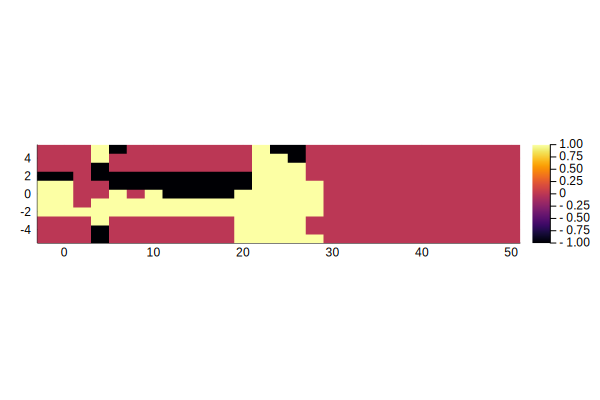

In [21]:
using Interact
using Plots
gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))


#@manipulate for ego_v in pomdp.EGO_V_RANGE
    ego_v = 16.0
    #@manipulate for ped_v in pomdp.PED_V_RANGE
    ped_v = 0.0
        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
       # 0.0, 15.0, 50.0, 5.0, 1.57, 0.0
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
                act = action(qmdp_policy, b) 
               # println(ped_s, "/", ped_t, " act: ", act.acc)
                policy_grid[i,j] = act.lateral_movement
            end
        end
        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
#    end
#end




In [ ]:
using Interact
using Plots
gr()

policy_grid = zeros(Float64, length(pomdp.T_RANGE), length(pomdp.S_RANGE))

@manipulate for ego_v in pomdp.EGO_V_RANGE
    @manipulate for ped_v in pomdp.PED_V_RANGE

        for i=1:length(pomdp.T_RANGE)
            ped_t = pomdp.T_RANGE[i]
            for j=1:length(pomdp.S_RANGE)
                ped_s = pomdp.S_RANGE[j]
                b = SparseCat([SingleOCFState(0.0, ego_v, ped_s, ped_t, 1.57, ped_v)],[1.])
                act = action(qmdp_policy, b) 
              #  println(ped_s, "/", ped_t, " act: ", act.acc)
                policy_grid[i,j] = act.lateral_movement
            end
        end

        xs = [pomdp.S_RANGE[i] for i = 1:length(pomdp.S_RANGE)]
        ys = [pomdp.T_RANGE[i] for i = 1:length(pomdp.T_RANGE)]
        heatmap(xs,ys,policy_grid,aspect_ratio=1)
    end
end


In [ ]:
# Test action space


cnt = 0
for (index, a) in enumerate(pomdp.action_space)
    idx = actionindex(pomdp,a)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
    println(a)
end
println(cnt)


In [ ]:
b = SingleOCFBelief([SingleOCFState(0.0, 5.0, 50.0, 3.0, 1.57, 0.0)], [1.0])
act = action(qmdp_policy, b) # policy
println(act)
PedestrianAvoidancePOMDP.action_values(qmdp_policy,b)
vi_policy.util[18223]

In [ ]:
using PedestrianAvoidancePOMDP

pomdp = SingleOCFPOMDP()

s = SingleOCFState(0.0, 11, 20.0, 0.0, 1.57, 1.5)
sp = SingleOCFState(0.0, 12, -6.0, 0.0, 0.0, 1.5)
act = SingleOCFAction(0.0, 1.0)
print("reward: ", reward(pomdp, s, act, sp))

b = SparseCat([sp],[1.])
act = action(qmdp_policy, b) 


In [ ]:

b = SparseCat([SingleOCFState(0.0, 11.0, 50.0, 5.0, 0., 0.)],[1.])
act = action(qmdp_policy, b) 
act.acc

In [ ]:
SparseValueIterationSolver

In [22]:
length(pomdp.lateral_actions)

1

ErrorException: syntax: type declarations on global variables are not yet supported